In [1]:
%matplotlib inline
import PS1QLS
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
dataLoc = '../../'
pQSO = np.loadtxt(dataLoc+'pQSO/pSDSScolmag.txt')[:,2:]
lQSO = np.loadtxt(dataLoc+'lQSO/SDSScolmag.txt')[:,2:]
sinQSO = np.loadtxt(dataLoc+'sinQSO/sSDSScolmag.txt')[:,2:]
unlQSO = np.loadtxt(dataLoc+'unlQSO/nlSDSScolmag.txt')[:,2:]
unlQSO[:,3:5] = -unlQSO[:,3:5] #bug in WISE magnitudes for this file

duds = np.concatenate((pQSO,unlQSO,sinQSO),axis=0)
data = np.concatenate((lQSO,duds),axis=0) #all sims
truth = np.concatenate((np.ones(lQSO.shape[0]),np.zeros(duds.shape[0])),axis=0)

In [2]:
train,test,truth_train,truth_test = train_test_split(data,truth,test_size=0.33)

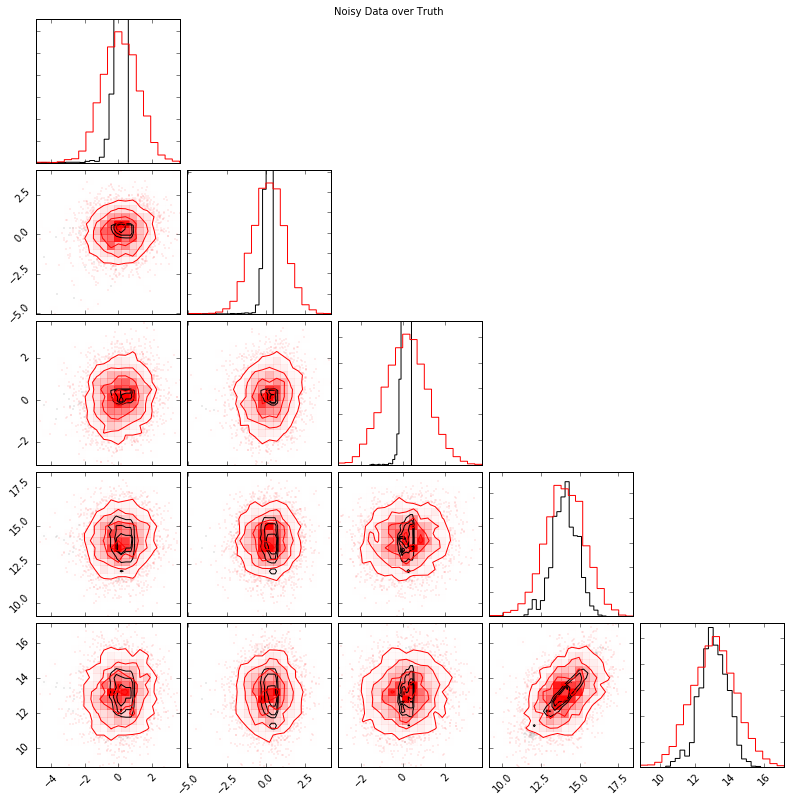

In [3]:
trainds = PS1QLS.Dataset(train,truth_train)
trainds.noisify()
trainds.plot()

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   40.7s finished


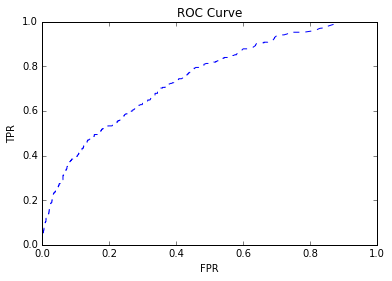

In [6]:
reload(PS1QLS)
RF = PS1QLS.Classifier(algorithm='RandomForest')
RF.train(trainds.data,trainds.truth,covmat=trainds.covmat)

testds = PS1QLS.Dataset(test,truth_test)
testds.noisify()

RF.test(testds.data,testds.covmat)
fpr_RF,tpr_RF = RF.make_roc(testds.truth)

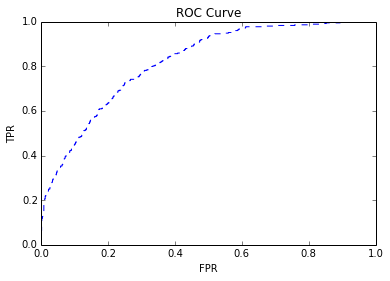

In [10]:
RF = PS1QLS.Classifier(algorithm='XD')

#RF.train(trainds.data,trainds.truth,covmat=trainds.covmat)
RF.load('xd.pkl')

testds = PS1QLS.Dataset(test,truth_test)
testds.noisify()

RF.test(testds.data,testds.covmat)
fpr_XD,tpr_XD = RF.make_roc(testds.truth)

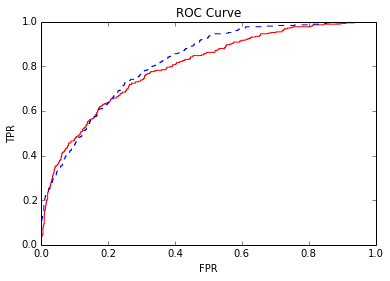

In [13]:
plt.title('ROC Curve')
plt.plot(fpr_RF,tpr_RF,'r')
plt.plot(fpr_XD,tpr_XD,'b--')
plt.xlabel('FPR')
plt.ylabel('TPR')